In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


we have 1000 rows and 40 columns in data
fraud_reported is target variable



In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation: we have 19 numerical and 21 object columns

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation: We have all rows null in _c39 column so dropping it

In [7]:
#dropping _c39 columns
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.shape

(1000, 39)

In [9]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [10]:
# replacing '?' with No info
df=df.replace('?','No Info')

Observation: some of the rows are having ? sign replacing them with No info

In [11]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('==========================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Observation: we can see there is one row in negative value must be the mistake or not sure droping the row

In [14]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [15]:
# droping this value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [16]:
# dividing ['incident_date] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [17]:
# in incident data all the incident is from 2015 so dropping the incident_year
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)

In [18]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# dropping policy_bind_date  column
df.drop('policy_bind_date',axis=1,inplace=True)

In [19]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [20]:
# dropping the policy_number  and  other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [21]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [22]:
df.shape

(999, 40)

In [23]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

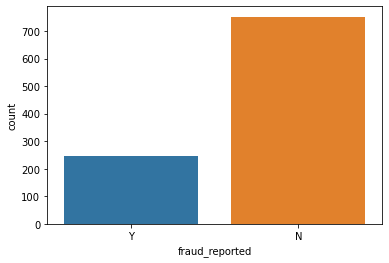

In [24]:
sns.countplot(df['fraud_reported'])

Observation : we can notice data is imbalance we have to deal with

# EDA

In [25]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


<AxesSubplot:>

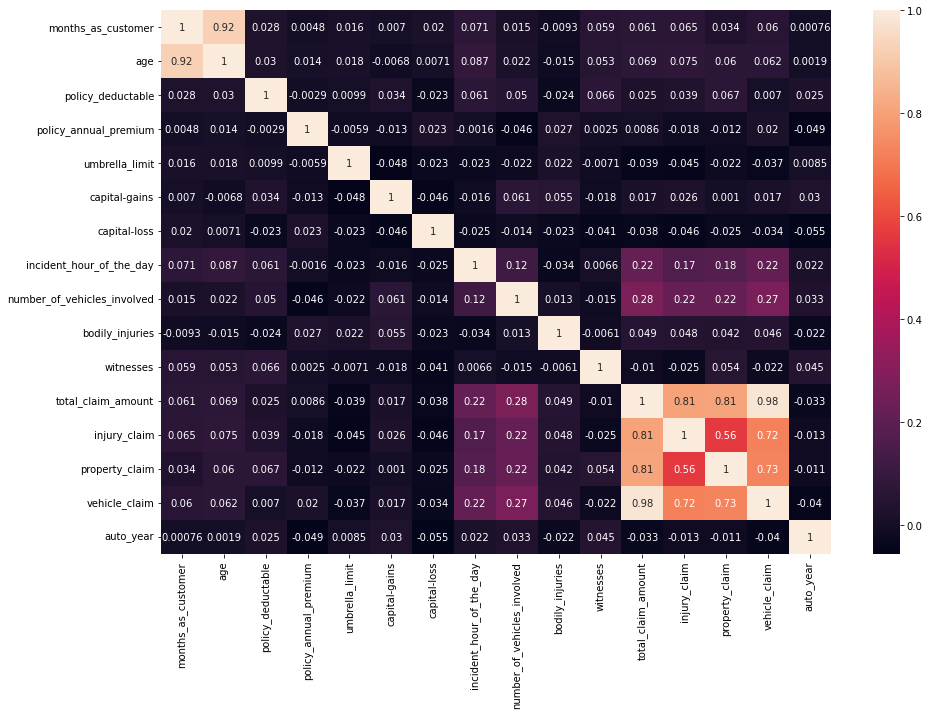

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Observation: 

We can notice total_claim-amount, injury_claim, property_claim and vehicle_claim are highly correlated with each other
All other are very least correlated with each other



<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

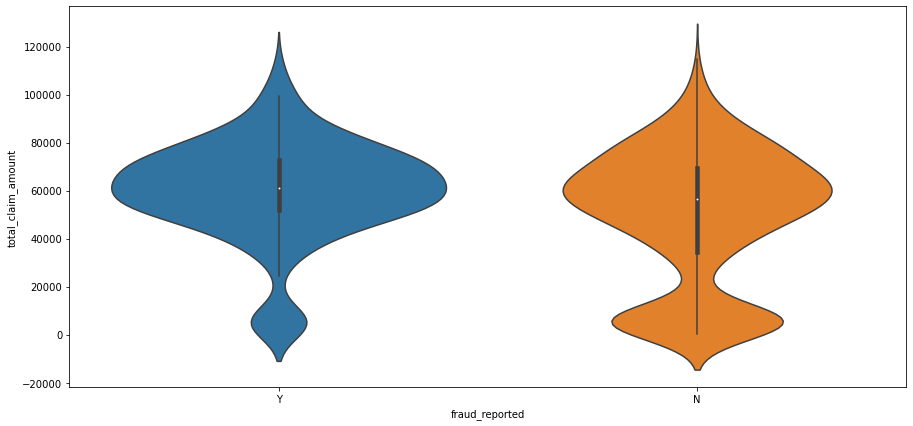

In [27]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

Observation: Most of fraud reported found where total claimed amount 50000 to 70000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

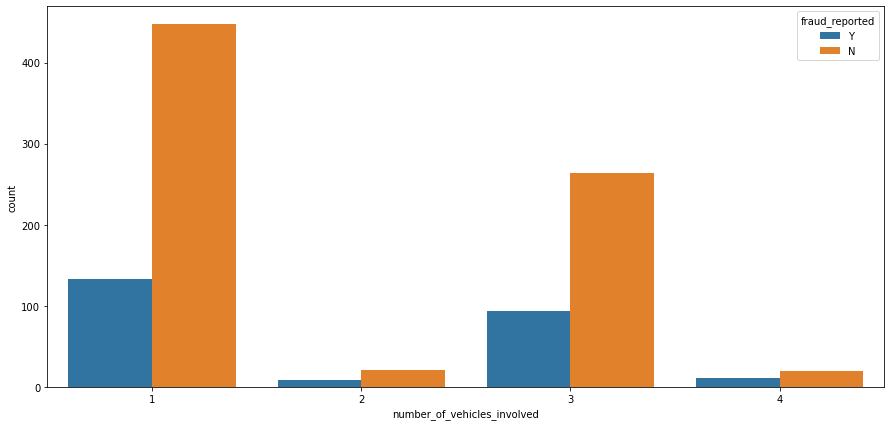

In [28]:
plt.figure(figsize=(15, 7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

Observation: most of fraud report were found where number_of_vehicles_involved more than 1

<AxesSubplot:xlabel='incident_city', ylabel='count'>

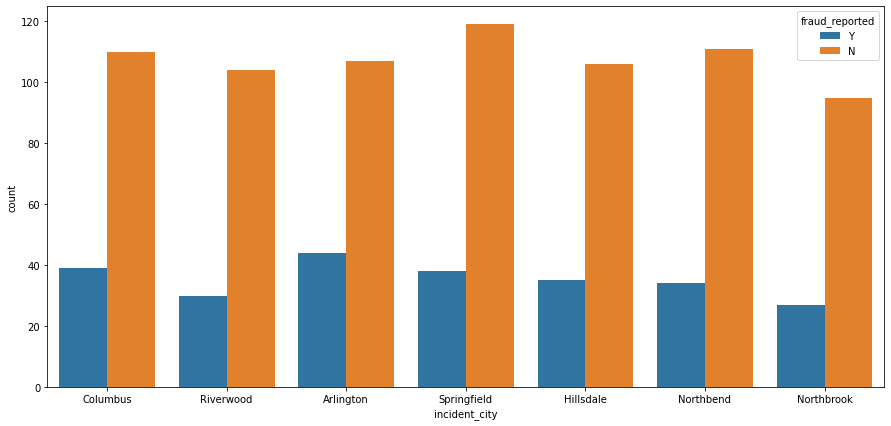

In [30]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

Observation: In all cities fraud reported count are almost same 

<AxesSubplot:xlabel='incident_state', ylabel='count'>

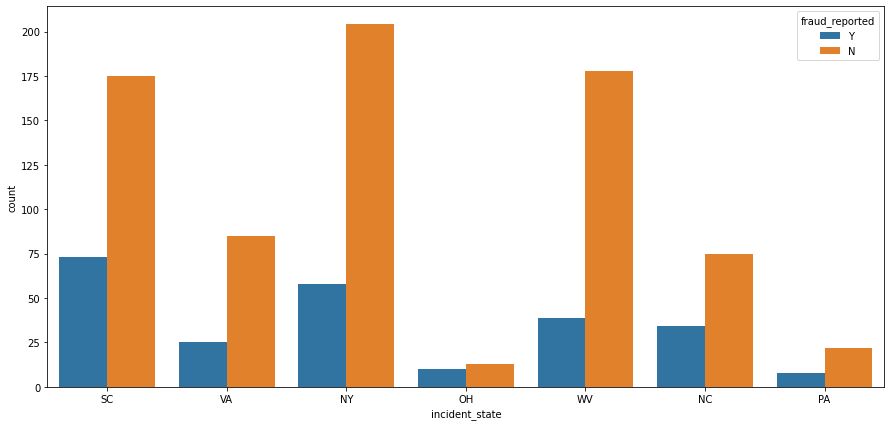

In [31]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

Observation : Most of fraud reported were found where incident state was SC, NY, OH, NC AND PA

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

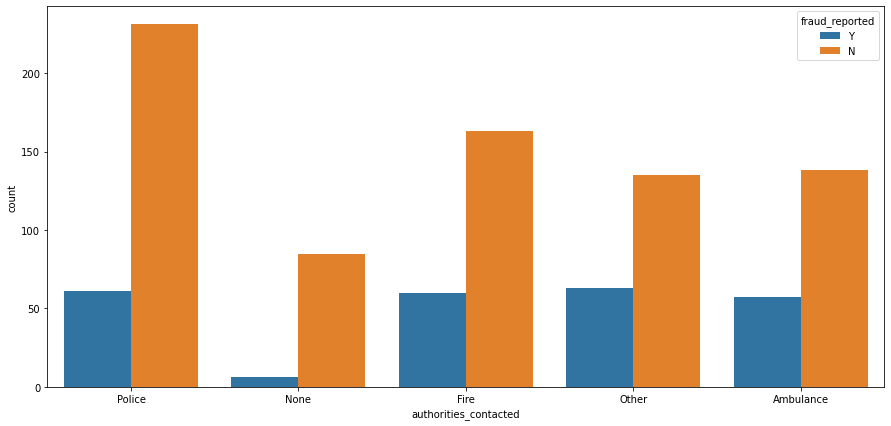

In [32]:
plt.figure(figsize=(15, 7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

Observation: most of fraud founded where cx have contacted authorities_contacted of Fire, Other and Ambulance 

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

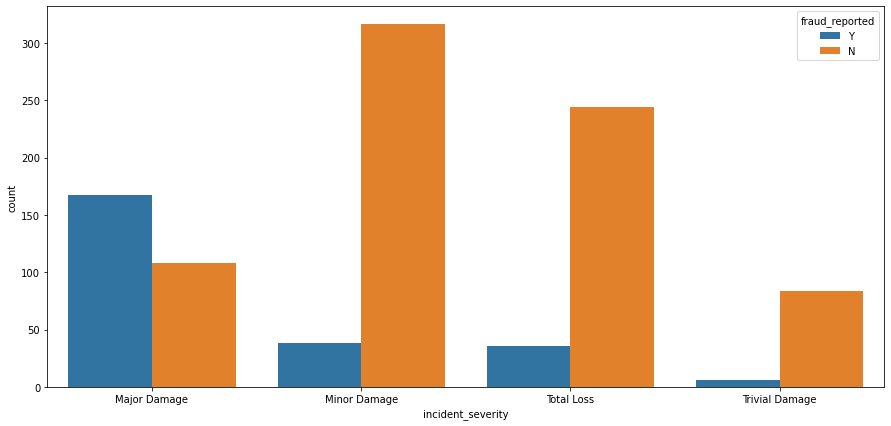

In [33]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

Observation:

    Most of fraud reported claim are Major Damage, most of them are counted as Fraud
    there are very fraud report in Trivial damage



<AxesSubplot:xlabel='collision_type', ylabel='count'>

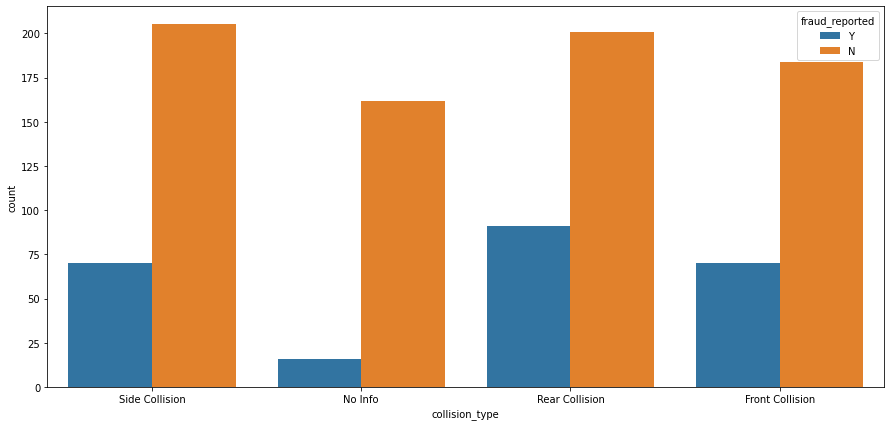

In [35]:
plt.figure(figsize=(15, 7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

Observation: 

    most of fraud reported claims in Side Collision, Rear Collision and Front Collision
    some of reported claim we have those are in no info of collision type



<AxesSubplot:xlabel='incident_type', ylabel='count'>

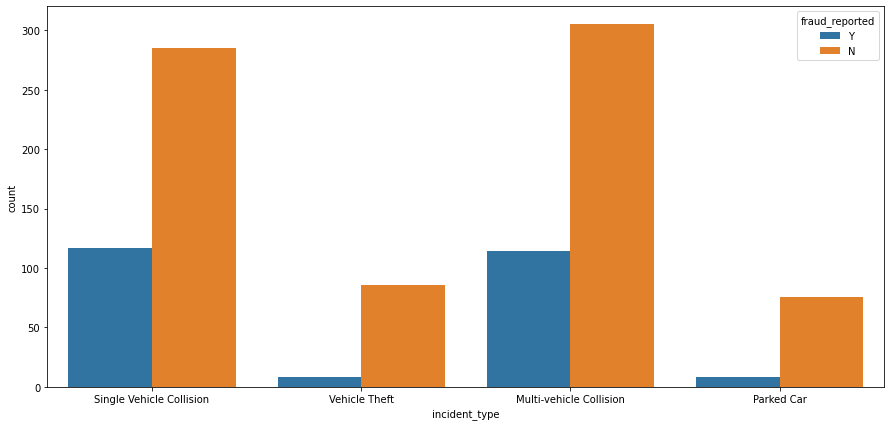

In [36]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

Observation: 

    we have most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type
    In other two incident type vehicle theft and parked car are very less fraud report



<AxesSubplot:xlabel='incident_Month', ylabel='count'>

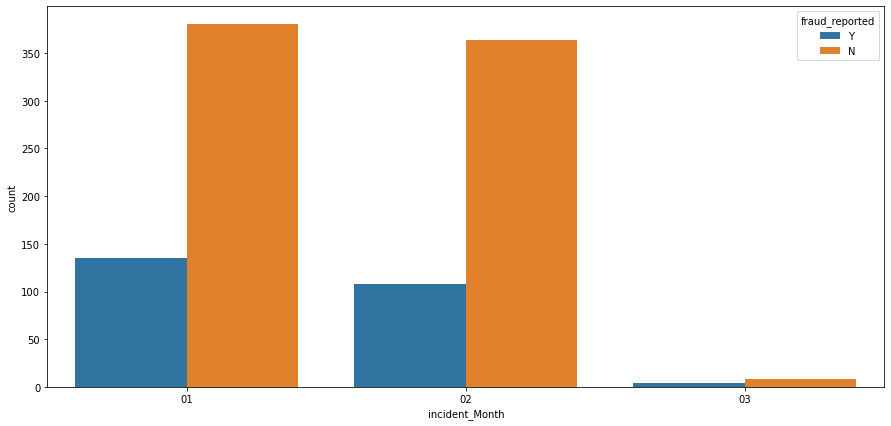

In [37]:
plt.figure(figsize=(15, 7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

Observation : most of the data we have reported in month 1 and 2 fraud reported are also around same in both months

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

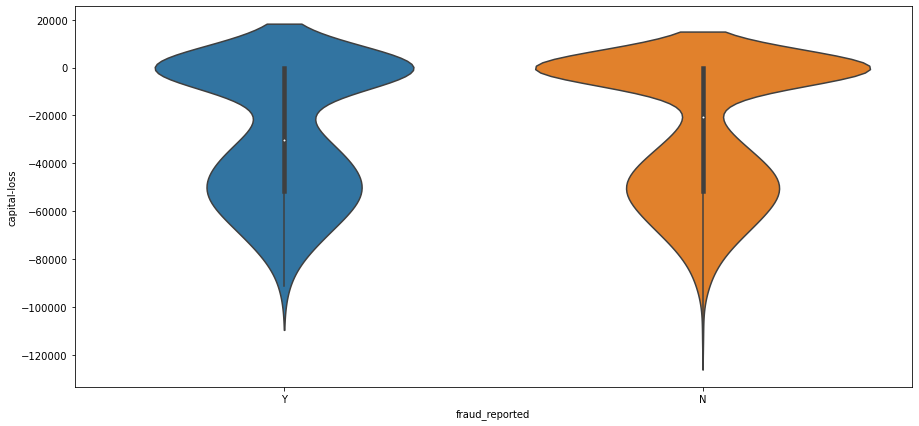

In [38]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)

Observation: most of fraud reported we see in cx those capital loss are and -40000 to -60000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

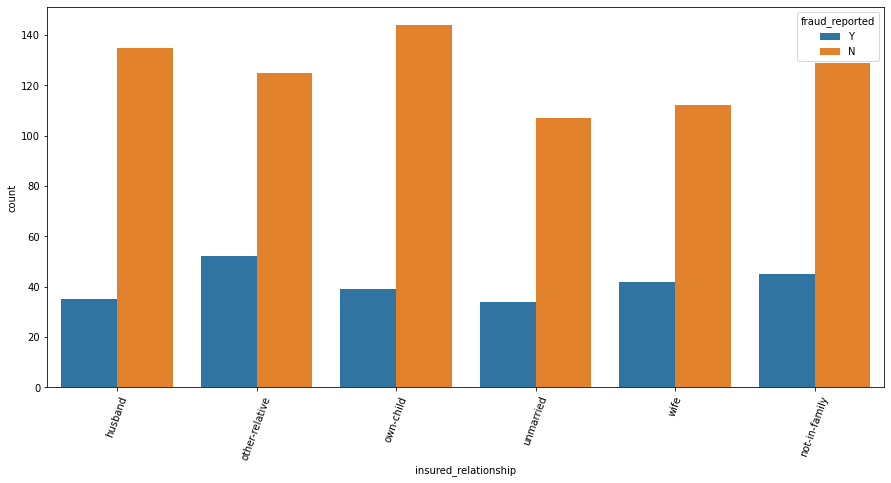

In [39]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

Observation: according the data info, cx those having insured relationship with other relative and wife are most reported than others 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

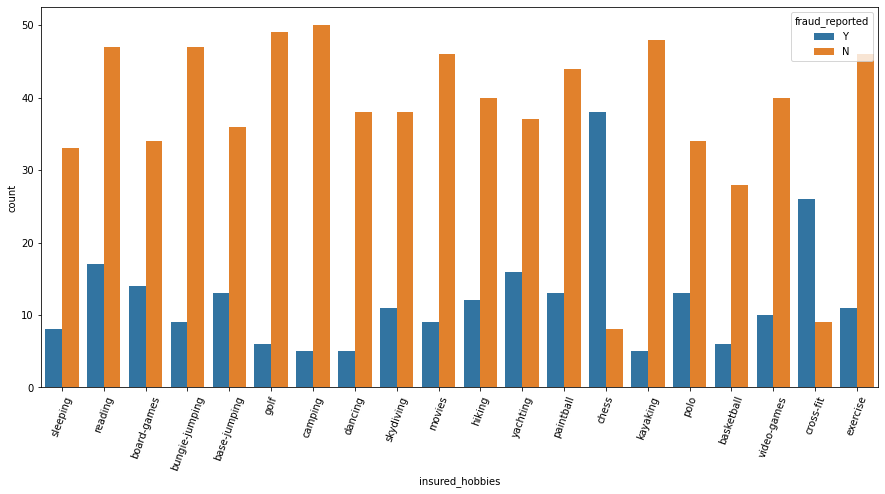

In [40]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

Observation: 

    Here we can see the cx those hobbies are Chess, are most fraud reported cx
    Here we can see the cx those hobbies are cross-fit, are also most fraud reported cx
    after that cx those hobbies are reading, board games, base-jumping, yechting, painball, polo and etc also most fraud report cx than others



<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

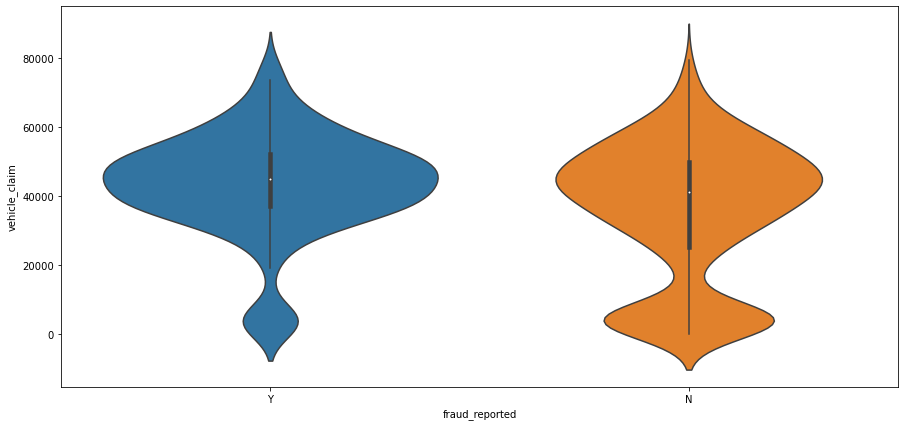

In [41]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

Observation: 

    In vehicle_claim most of the cx are between 100 to 6500
    fraud report is higher in cx are between 3500 to 5500 vehicle_claim



<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

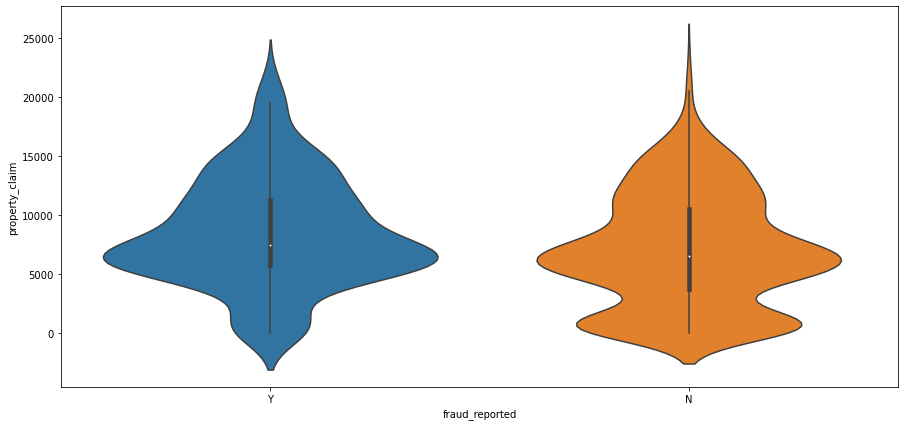

In [42]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

In Propery claim fraud reported is higher in cx claimed of 5000 to 8000

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

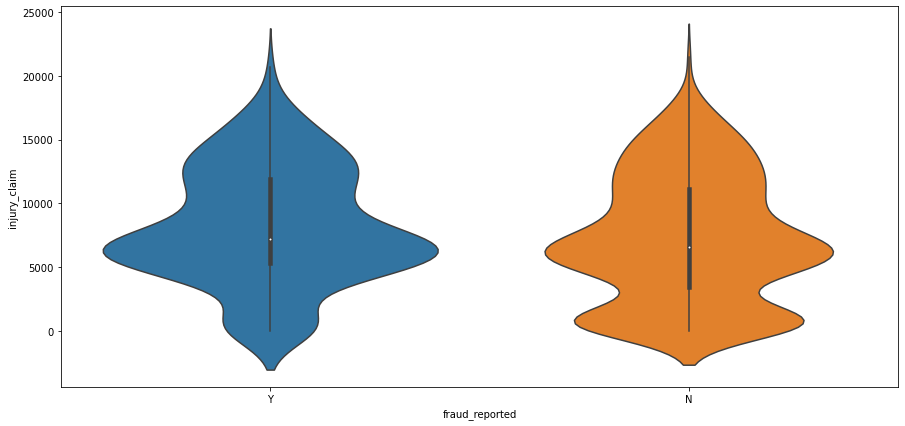

In [43]:
plt.figure(figsize=(15, 7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)



    most of the cx injury claim is 100 to 15000
    most fraud reported cx are between 5000 to 8000 injury claim



<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

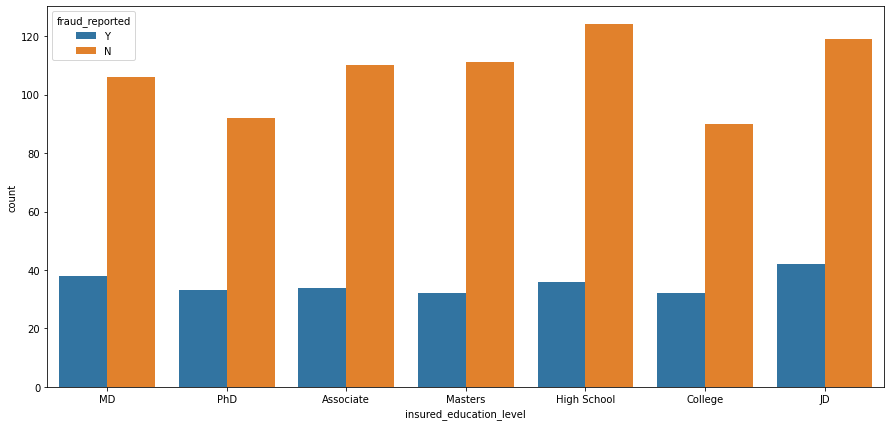

In [44]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

Observation: 

    we higher cx those are education level is High School and least cx in PhD ad College
    there is very little diffrence in fraud report in all kind of cx
    fraued report is little higher in cx those education level is JD, MD, PhD, and College than others



<AxesSubplot:xlabel='insured_sex', ylabel='count'>

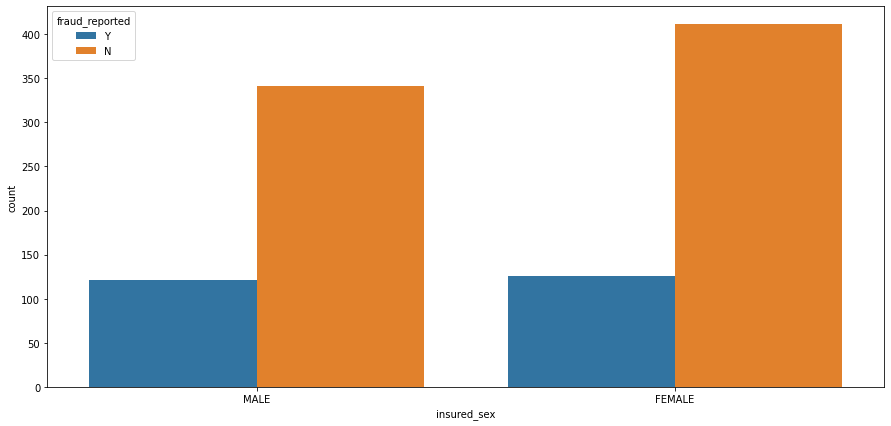

In [45]:
plt.figure(figsize=(15, 7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)


Observation: 
    we have more cx in Female than the Male
    but fraud reported is little high Male cx



<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

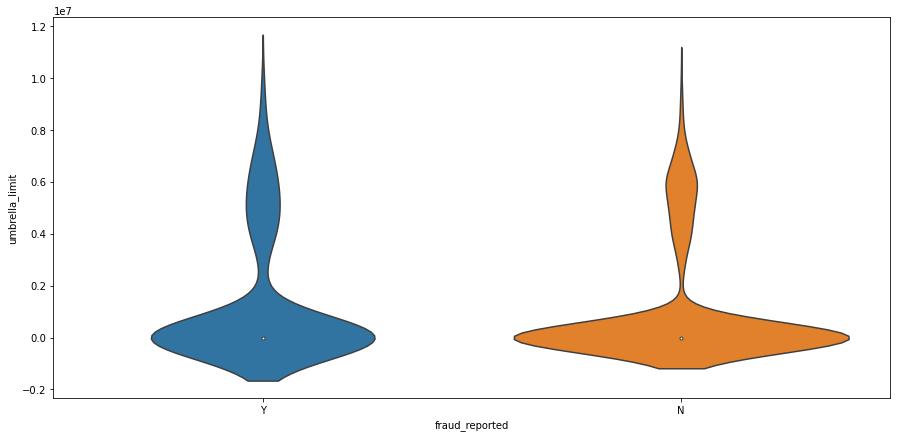

In [47]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data= df )

Observation: most of cx we have their umbrella limit is 0

    fraud reported is also high those cx


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

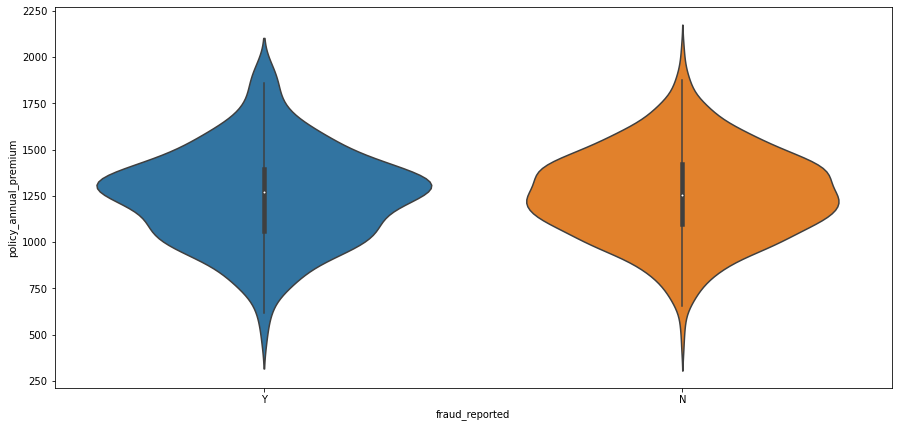

In [48]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data= df )



    most of cx we have 1000 to 1500 of premium payers
    most of the fraud reported we found in those premium is 1250 to 1300



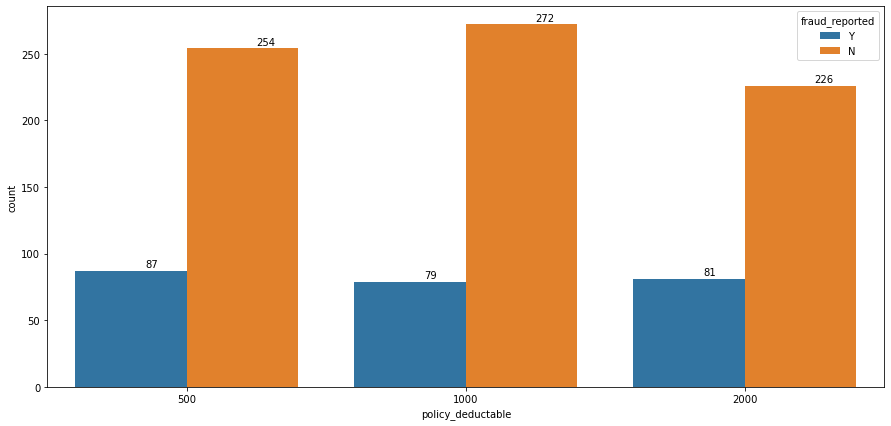

In [49]:
plt.figure(figsize=(15, 7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data= df )
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Observation: Here we notice here according to count fraud report high in cx of 2000 policy_deductable

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

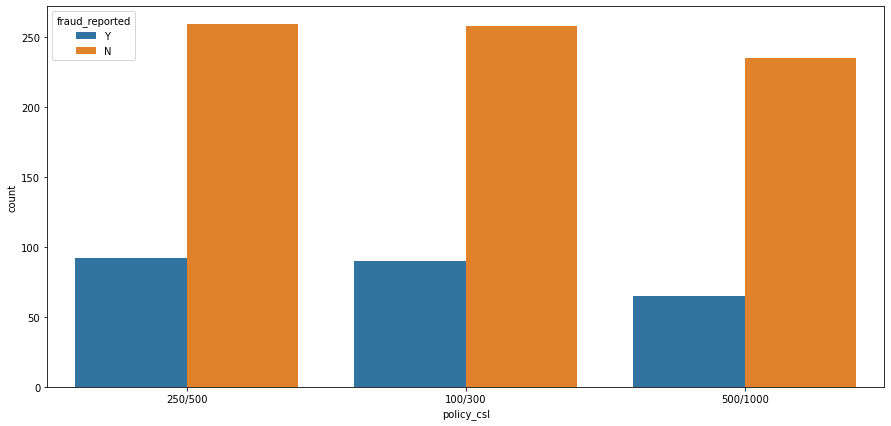

In [50]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_csl',hue='fraud_reported',data= df )

Observation: In all three csl we same kind of similarty fraud report is also common in all policy_csl

<AxesSubplot:xlabel='policy_state', ylabel='count'>

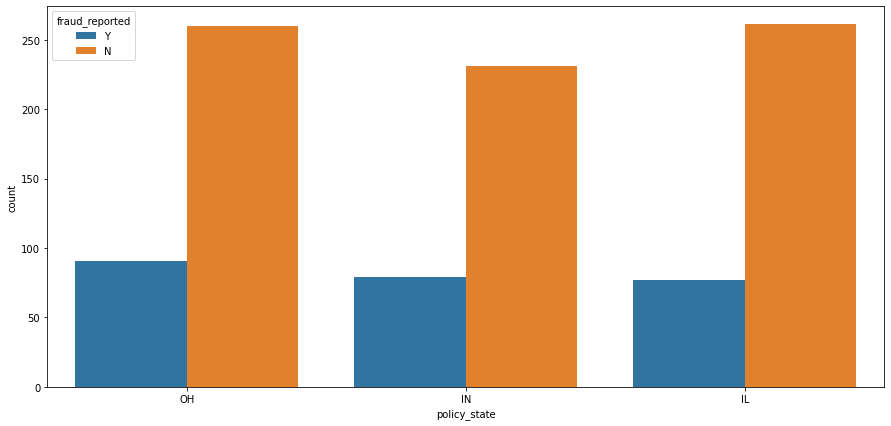

In [51]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_state',hue='fraud_reported',data= df )

Observation: we have cx from three states and fraud report almost common in all three states

<AxesSubplot:xlabel='age', ylabel='count'>

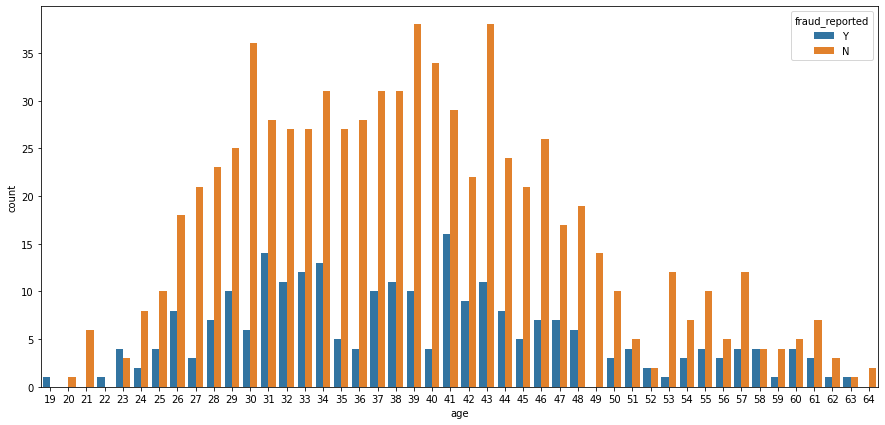

In [52]:
plt.figure(figsize=(15, 7))
sns.countplot(x='age',hue='fraud_reported',data= df )

Observation:

    We see most the cx are age of 26 to 50
    fraud report is higher in cx 26 to 50 of age



<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

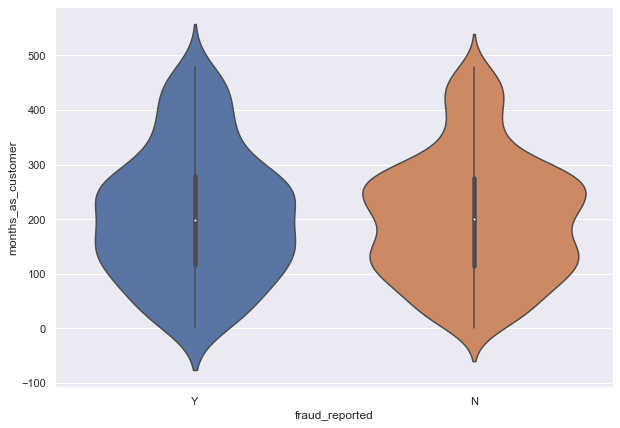

In [53]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data= df )

Observation: 

    most of the cx are 100 to 300 months old
    We can notice here fraud report is high in cx between 100 to 250 months old



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

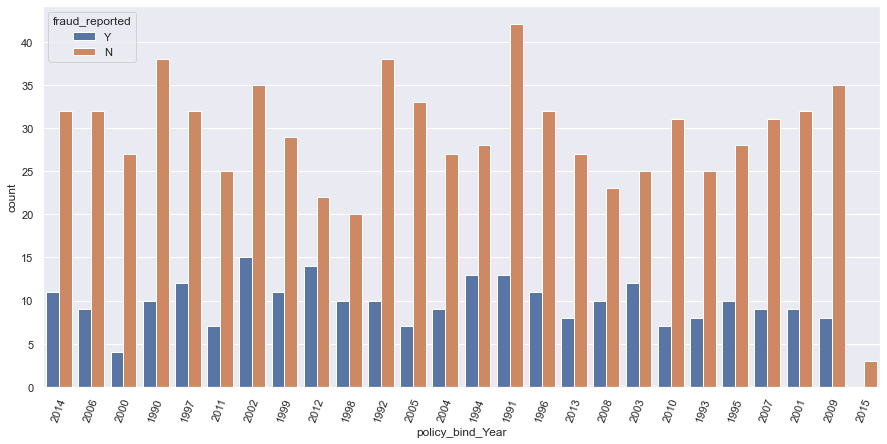

In [54]:
plt.figure(figsize=(15, 7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

here we notice fraud report is high in policy_bind_year of 2014,2006,1990,1997,2002,1999,2012, 1998,1994,2008,2003 and etc than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

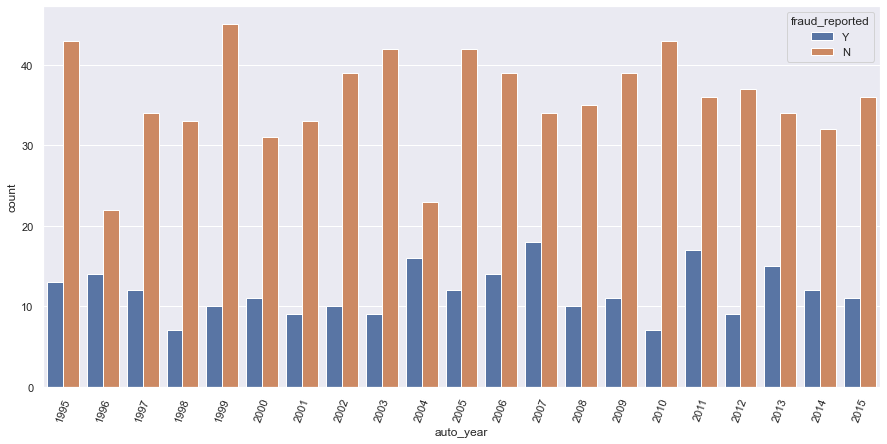

In [55]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

Observation: 

    we can notice we have less vehicle from 1996 and 2004 auto year
    according to vehice count fraud reported is higher in vehicle of 1996, 2004 , 2007, 2011, 2013, 2014 and etc auto year than others



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

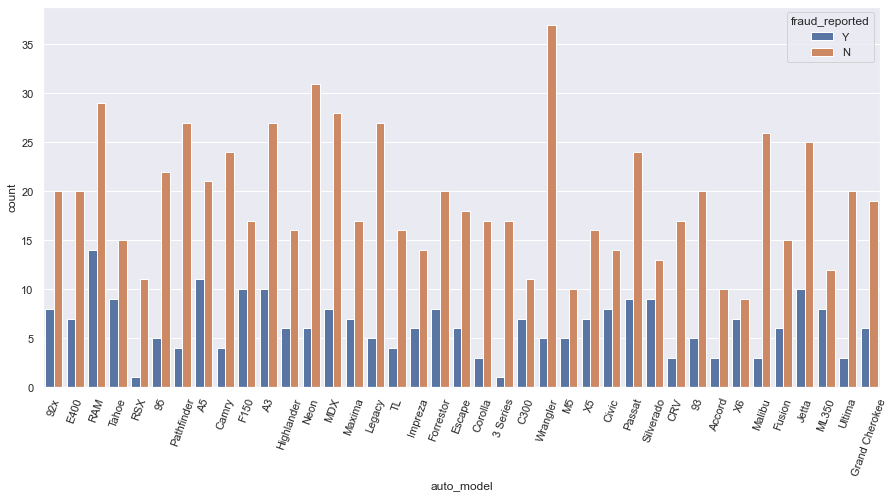

In [56]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation = 70,)

Observation: 

    most of auto_model we see in Wrangler, RAM, Pathfinder, Neon and etc
    we can notice Fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, M5, CIVIC, SILVERADOX6 ML300 AND ETC atuo_models



<AxesSubplot:xlabel='auto_make', ylabel='count'>

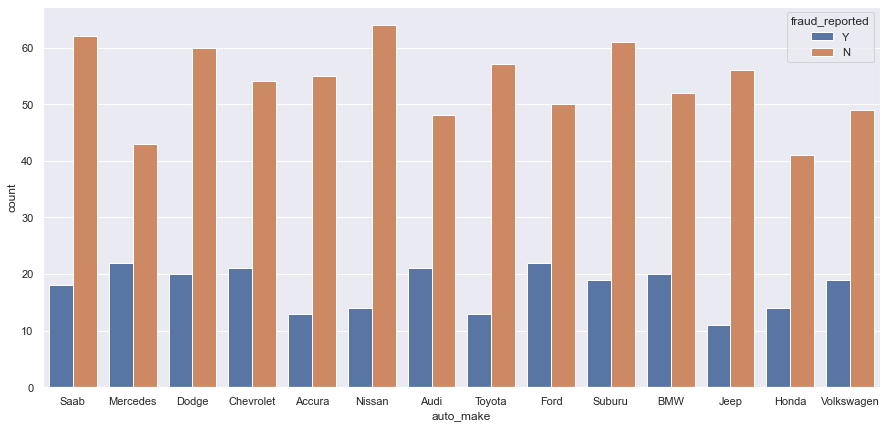

In [57]:
plt.figure(figsize=(15, 7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

Observation: 

    fraud reported claim is higher in Saab, Merceded, Dodge, Chevrolet, Audi, Ford, Suburu, BMW and Volkswagen auto_make
    In Other Auto_make brand is less than others



# Have done the analysis of all important features, some of features don't have much information to define

# Skewness handling

Skewness and outliers will be handel in numerical numerical columns only`

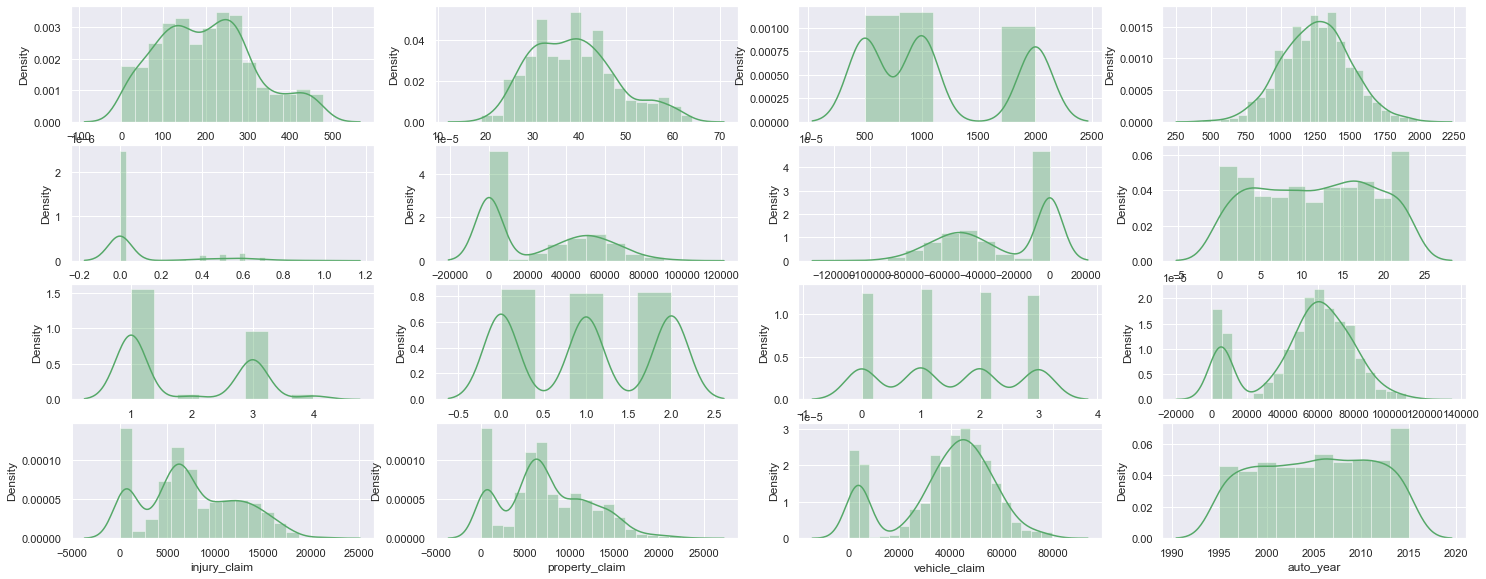

In [60]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')



In [61]:
df.select_dtypes(include=['int64', 'float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

Observation:
skewness more than+/- 0.5 will we treated
object and target variable columns will no be treated

we can see here most of the columns are skewed
will only deal with numercal columns

    umbrella_limit
    total_claim_amount
    vehicle_claim

will be treated


In [62]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

# Outliers Handling

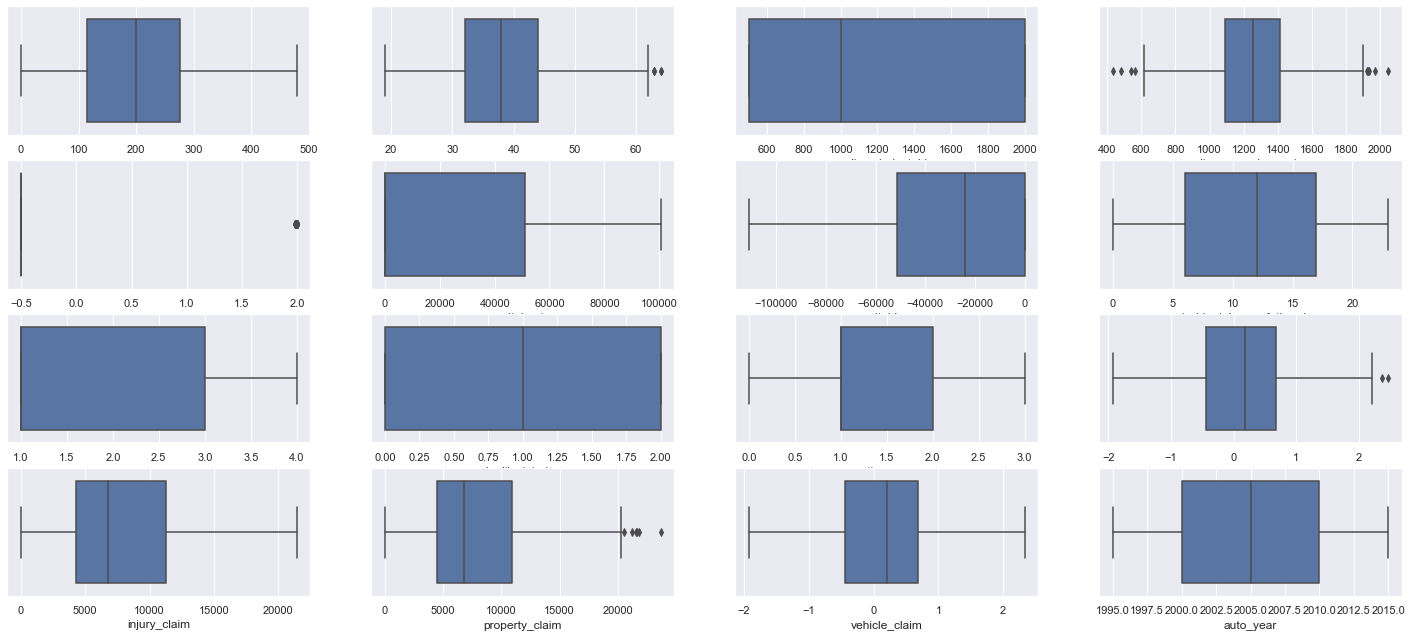

In [66]:
plt.figure(figsize=(25,25))
for o in enumerate(df.select_dtypes(include=['int64', 'float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

Observation: Only some of columns seems having outliers after skewness removed .

# outliers removal

# zscore

In [67]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64', 'float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [68]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (999, 40)
After removing outliers:: (994, 40)


Observation: Zscore removing all rows from data

# IQR

In [69]:
from scipy import stats 
IQR = stats.iqr(df.select_dtypes(include=['int64', 'float','int32'])) 
IQR 

1230.8691969059628

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df.select_dtypes(include=['int64', 'float','int32'])[~((df.select_dtypes(include=['int64', 'float','int32']) < (Q1 - 1.5 * IQR)) |(df.select_dtypes(include=['int64', 'float','int32']) > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(313, 16)


# choosing ZSCORE because there is huge dataloss in IQR

In [71]:
df=df_1

# Using LabelEncoder for convering categorical to numerical

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
#Encoding object columns into Numeric Values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64', 'float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

All columns are converted into numerical now

# Dividing data into X and Y

In [76]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [77]:
x.shape

(994, 39)

In [78]:
y.shape

(994,)

# scaling X values

In [79]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [80]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [81]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,...,0.337963,0.452576,0.504179,0.508790,0.505785,0.467270,0.248994,0.480751,0.506585,0.463380
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,...,0.219722,0.235036,0.310061,0.293301,0.300326,0.288265,0.261924,0.293300,0.318378,0.294742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,...,0.203347,0.349015,0.230769,0.263158,0.250000,0.233333,0.000000,0.233333,0.181818,0.200000
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,...,0.308803,0.499869,0.538462,0.526316,0.500000,0.466667,0.000000,0.483333,0.545455,0.480000
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,...,0.497707,0.612979,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

# Imbalanced learn

Using OverSamling_BorderlineSMOTE

    because there is less data in Churn for yes


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

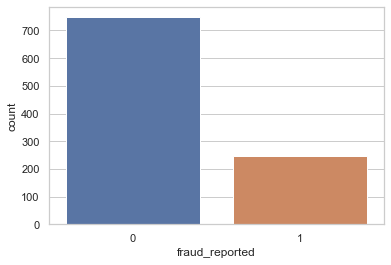

In [82]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

In [83]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (994,)
Resample Target dataset shape (1496,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

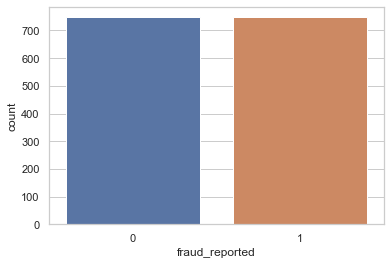

In [84]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

# Training Models

In [86]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [87]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()
lst=[lr,rf,kn,sv,dt,gb]

In [89]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is:-{LR.score(x_train,y_train)}')
    print(f'At random state {i}, The test accuracy is:-{accuracy_score(y_test,LR_predict_test)}')

At random state 0, The training accuracy is:-0.7718360071301248
At random state 0, The test accuracy is:-0.7433155080213903
At random state 1, The training accuracy is:-0.7691622103386809
At random state 1, The test accuracy is:-0.7486631016042781
At random state 2, The training accuracy is:-0.7762923351158645
At random state 2, The test accuracy is:-0.7272727272727273
At random state 3, The training accuracy is:-0.7647058823529411
At random state 3, The test accuracy is:-0.7486631016042781
At random state 4, The training accuracy is:-0.7700534759358288
At random state 4, The test accuracy is:-0.7433155080213903
At random state 5, The training accuracy is:-0.7655971479500892
At random state 5, The test accuracy is:-0.7379679144385026
At random state 6, The training accuracy is:-0.7620320855614974
At random state 6, The test accuracy is:-0.7379679144385026
At random state 7, The training accuracy is:-0.7557932263814616
At random state 7, The test accuracy is:-0.7593582887700535
At rando

Observation: Observation: At random state 15 giving highest accuracy of 0.788 so we are choosing that as random state

# Spliting Train and Test data

In [85]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=0.25,random_state=15)

In [92]:
x_train.shape

(1122, 39)

In [93]:
y_train.shape

(1122,)

In [94]:
x_test.shape

(374, 39)

In [95]:
y_test.shape

(374,)

# Logistic Regression:

In [96]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [101]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7493422519509476


In [102]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7887700534759359
[[140  38]
 [ 41 155]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       178
           1       0.80      0.79      0.80       196

    accuracy                           0.79       374
   macro avg       0.79      0.79      0.79       374
weighted avg       0.79      0.79      0.79       374

Training accuracy:: 0.750445632798574
Test accuracy:: 0.7887700534759359


# DECISION TREE CLASSIFIER

In [103]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8175629877369006


In [104]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.820855614973262
[[155  23]
 [ 44 152]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       178
           1       0.87      0.78      0.82       196

    accuracy                           0.82       374
   macro avg       0.82      0.82      0.82       374
weighted avg       0.83      0.82      0.82       374

Training accuracy:: 1.0
Test accuracy:: 0.820855614973262


# KNeighborsClassifier

In [105]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6597658862876254


In [106]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6764705882352942
[[ 64 114]
 [  7 189]]
              precision    recall  f1-score   support

           0       0.90      0.36      0.51       178
           1       0.62      0.96      0.76       196

    accuracy                           0.68       374
   macro avg       0.76      0.66      0.64       374
weighted avg       0.76      0.68      0.64       374

Training accuracy:: 0.7397504456327986
Test accuracy:: 0.6764705882352942


# RandomForestClassifier

In [107]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.877763656633222


In [108]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.893048128342246
[[165  13]
 [ 27 169]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       178
           1       0.93      0.86      0.89       196

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.89       374
weighted avg       0.90      0.89      0.89       374

Training accuracy:: 1.0
Test accuracy:: 0.893048128342246


# ENSEMBLE TECHNIQUES

# 1.ADA BOOST CLASSIFIER

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [111]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8584876957494407


In [112]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8716577540106952
[[159  19]
 [ 29 167]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       178
           1       0.90      0.85      0.87       196

    accuracy                           0.87       374
   macro avg       0.87      0.87      0.87       374
weighted avg       0.87      0.87      0.87       374

Training accuracy:: 0.8921568627450981
Test accuracy:: 0.8716577540106952


# 3.Gradient Boosting classifier

In [113]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8844876957494406


In [114]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.9064171122994652
[[160  18]
 [ 17 179]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       178
           1       0.91      0.91      0.91       196

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374

Training accuracy:: 0.9768270944741533
Test accuracy:: 0.9064171122994652


# 
OBSERVATION:

Choosing :

         GradientBoostingClassifier as final model

          for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well

         Rest of the models having huge difference between train and test accuracies so not considering them.



# HYPER PARAMETER TUNING: GradientBoostingClassifier

In [115]:
adb=GradientBoostingClassifier()
param_grid={
    'criterion' : ['mse', 'mae'],
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[5]              
}

In [116]:
adb_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [117]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8770053475935828


In [118]:
adb_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 5}

model training with best parameters

In [119]:
best_param={
    'criterion' : ['mse'],
    'n_estimators':[100],
    'learning_rate':[0.5],
     'random_state':[5]    }  

In [120]:
best_adb_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [121]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.9037433155080213


# As we notice after HYPER PARAMETER TUNING models accuracy score got increased

# Report of GradientBoostingClassifier

In [122]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       178
           1       0.91      0.90      0.91       196

    accuracy                           0.90       374
   macro avg       0.90      0.90      0.90       374
weighted avg       0.90      0.90      0.90       374



<AxesSubplot:>

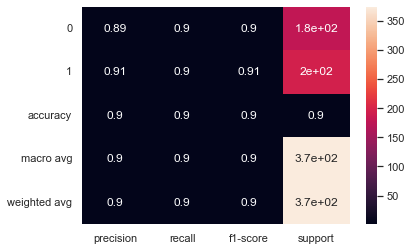

In [123]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [124]:
from sklearn.metrics import roc_auc_score

In [125]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.9037778032561338


In [126]:
from sklearn.metrics import roc_curve

In [127]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

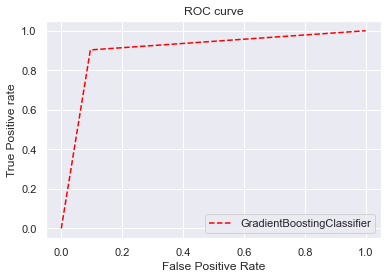

In [128]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [129]:
import pickle
filename='Insurance_claim_fraud_detection__project.pkl'
pickle.dump(best_adb_grid,open(filename,'wb'))

# Conclusion:

In [130]:
loaded_model=pickle.load(open('Insurance_claim_fraud_detection__project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

90.37433155080214
